#!/usr/bin/env python

#coding: utf-8

## Car Price Prediction

This data set consists of three types of entities: (a) the specification of an auto in zerms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of 3 indicates that the auto is risky. -3 that it is probably pretty safe.

#The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. #

#Note: Several of the attributes in the database could be used as a "class" attribute.

<b>Attribute Information:</b>

#1. symboling: -3, -2, -1, 0, 1, 2, 3.

# 2. normalized-losses: continuous from 65 to 256.

#3. make: alfa-romero, audi, bmw, chevrolet. dodge, honda, isuzu, jaguar, mazda, mercedes- benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

#4. fuel-type: diesel, gas. #5. aspiration: std, turbo.

#6. num-of-doors: four, two. 7. body-style: hardtop, wagon, sedan,
#8. drive-wheels: 4wd, fwd, rad. #9. engine-location: front, rear.

#10. wheel-base: continuous from 86.6 120.9. #11. length: continuous from 141.1 to 208.1.

#12. width: continuous from 60.3 to 72.3. #13. height: continuous from 47.8 to 59.8.

#14. curb-weight: continuous from 1488 to 4066. #15. engine-type: dohc, dohcy, 1, ohc, ohcf
ohcy, rotor.

16. num-of-cylinders: eight, five, four, six, three, twelve, two.

#17, engine-size: continuous from 61 το 326. #18. fuel-system: tbbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

#19. bore: continuous from 2.54 to 3.94.

#20. stroke: continuous from 2.07 to 4.17.

#21. compression-ratio: continuous from 7 to

23.

#22. horsepower: continuous from 48 to 288. #23. peak-rpm: continuous from 4150 to 6600.

#24. city-mpg: continuous from 13 to 49.

#25. highway-mpg: continuous from 16 to 54. #26. price: continuous from 5118 to 45400.

#

#<b>Data Source:</b>

https://archive.ics.uci.edu/ml/datasets/Automobi le


#### Below mentioned are the steps to be
followed


<b>Part 1</b>

Data understanding and exploration

Data cleaning

Data preparation Model building

Prediction and Evaluation

85%

#

#<b>Part 2</b> Automatic Feature Elimination using RFE

<b>Part 3</b> Principal Component Analysis

#Int[]:

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
           "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]

df = pd.read_csv(url, names=columns)

In [ ]:

df.replace('?', pd.NA, inplace=True)
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(subset=['price'], inplace=True)
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

<ipython-input-2-1a5ee3f680f9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
<ipython-input-2-1a5ee3f680f9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.show()

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['price'])
y = df['price']
X = pd.get_dummies(X, drop_first=True)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
print(X.columns[rfe.support_])

Index(['make_mercedes-benz', 'fuel-type_gas', 'fuel-system_idi',
       'fuel-system_spfi', 'bore_3.43', 'bore_3.80', 'stroke_3.10',
       'stroke_3.27', 'stroke_3.64', 'peak-rpm_4350'],
      dtype='object')


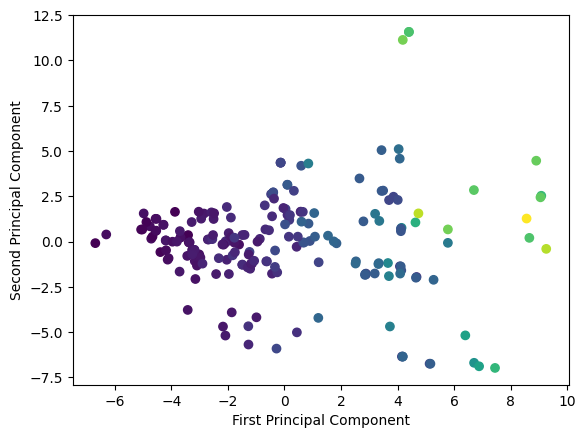

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7062814.653158468
